## $\S$ 5.2.1. Natural Cubic Splines

The behavior of polynomials fit to data tends to be erratic near the boundaries, and extrapolation can be dangerous. These problems are exacerbated with splines. This can be conveniently summarized in terms of the pointwise variance of spline functions fit by least squares (see the example in $\S$ 5.3 for details). In FIGURE 5.3 we can see that the explosion of the variance near the boundaries is clear, and inevitably worst for cubic splines.

### More constraints near boundaries

A _natural cubic spline_ adds additional constraints, namely that the function is linear beyond the boundary knots. This frees up four $\text{df}$s (two constraints each in both boundary regions), which can be spent more profitably by sprinkling more interior knots.

This tradeoff is illustrated in terms of variance in FIGURE 5.3. There will be a price paid in bias near the boundaries, but the assumption that the function is linear near the boundaries (where we have less information anyway) is often considered reasonable.

### Constructing basis functions

A natural cubic splines with $K$ knots is represented by $K$ basis functions. One can start from a basis for cubic splines, and then derive the reduced basis by imposing the boundary constraints.

For example, starting from the truncated power series basis in $\S$ 5.2, we arrive at (Exercise 5.4):

\begin{align}
N_1(X) &= 1, \\
N_2(X) &= X, \\
N_{k+2}(X) &= d_k(X) - d_{K-1}(X),
\end{align}

where

\begin{equation}
d_k(X) = \frac{(X-\xi_k)_+^3 - (X-\xi_K)_+^3}{\xi_K-\xi_k}.
\end{equation}

Each of these basis functions can be seen to have zero second and third derivative for $X \ge \xi_K$.

In [1]:
"""Example for the natural cubic spline
It uses the same data of FIGURE 5.2.
"""
%matplotlib inline
import scipy
import scipy.linalg
import matplotlib.pyplot as plt

# Limits
x0, x1 = scipy.array([0, 1])*8-1
xis = scipy.array([.1, .26, .42, .58, .74, .9])*8-1
# x0, xi0, xi1, x1 = -1, 1.5, 4.5, 7
y0, y1 = 0, 4

# Sine line
xgrid = scipy.linspace(x0, x1, 100)
ygrid = scipy.cos(xgrid)+2
# Random sample
size_sample = 60
err_sample = scipy.randn(size_sample)*.3
x_sample = scipy.linspace(x0, x1, size_sample)
y_sample = scipy.cos(x_sample)+2+err_sample

In [2]:
def d(x:scipy.ndarray, xis:scipy.ndarray, k:int)->scipy.ndarray:
    return (scipy.where(x < xis[k], 0, (x-xis[k])**3)
            - scipy.where(x < xis[-1], 0, (x-xis[-1])**3))/(xis[-1]-xis[k])

In [3]:
# Natural cubic spline
# Construct H
h1 = scipy.ones_like(x_sample)
h2 = scipy.copy(x_sample)
h3 = d(x_sample, xis, 0)-d(x_sample, xis, -2)
h4 = d(x_sample, xis, 1)-d(x_sample, xis, -2)
h5 = d(x_sample, xis, 2)-d(x_sample, xis, -2)
h6 = d(x_sample, xis, 3)-d(x_sample, xis, -2)
H = scipy.vstack((h1, h2, h3, h4, h5, h6)).T
# OLS
HH = H.T @ H
beta = scipy.linalg.solve(HH, H.T @ y_sample)
y_hat = H @ beta

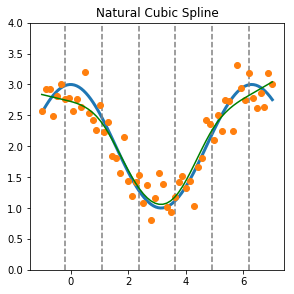

In [5]:
# Plot
fig = plt.figure(51, figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1)
ax.plot(xgrid, ygrid, linewidth=3)
for xi in xis:
    ax.plot([xi, xi], [y0, y1], '--', color='gray')
ax.set_ylim(y0, y1)
ax.plot(x_sample, y_sample, 'o')
ax.plot(x_sample, y_hat, color='g')
ax.set_title('Natural Cubic Spline')
plt.show()